In [1]:
import pandas as pd
import Helper
import numpy as np

error_df = pd.read_csv("Data/Forecast accuracy data/Second Iteration/error_summary.csv")
UEEE_df = pd.read_csv("Data/Forecast accuracy data/Second Iteration/carrier_history_ueee.csv.gz", compression="gzip")
EEEE_df = pd.read_csv("Data/Forecast accuracy data/Second Iteration/carrier_history_eeee.csv.gz", compression="gzip")


In [2]:
error_df

,Unnamed: 0,trial,sample,timeframe,booking_class,sold,forecast_mean,error
0,0,0,50,0,Y0,3,4.000000,1.000000
1,1,0,50,0,Y1,19,14.773054,-4.226946
2,2,0,50,0,Y2,30,30.546340,0.546340
3,3,0,50,0,Y3,86,68.095795,-17.904205
4,4,0,50,0,Y4,30,25.537782,-4.462218
...,...,...,...,...,...,...,...,...
79995,79995,0,549,15,Y5,0,0.000000,0.000000
79996,79996,0,549,15,Y6,0,0.000000,0.000000
79997,79997,0,549,15,Y7,0,0.000000,0.000000
79998,79998,0,549,15,Y8,0,0.000000,0.000000


In [3]:
# delete all the records from error_df where the sample is less than 101
error_df = error_df[error_df['sample'] >= 101]

In [4]:
EEEE_df = EEEE_df[EEEE_df['sample'] >= 101]
UEEE_df = UEEE_df[UEEE_df['sample'] >= 101]

In [5]:
UEEE_df = UEEE_df[UEEE_df['carrier'] == 'AL1']
EEEE_df = EEEE_df[EEEE_df['carrier'] == 'AL1']
EEEE_df['priceable_mix'] = EEEE_df['sold_priceable'] / EEEE_df['sold']
UEEE_df['priceable_mix'] = UEEE_df['sold_priceable'] / UEEE_df['sold']
UEEE_df

,trial,sample,carrier,sold,sold_priceable,revenue,priceable_mix
51,0,101,AL1,9976,5185,3693195.43,0.519747
52,0,102,AL1,11060,5781,4241429.52,0.522694
53,0,103,AL1,11042,5497,4043161.98,0.497826
54,0,104,AL1,10848,5561,4116367.13,0.512629
55,0,105,AL1,10417,5678,3795282.98,0.545071
...,...,...,...,...,...,...,...
495,0,545,AL1,10608,5607,3917057.35,0.528563
496,0,546,AL1,10384,5371,4008044.21,0.517238
497,0,547,AL1,10538,5368,4005986.23,0.509395
498,0,548,AL1,11125,5584,4111494.37,0.501933


In [6]:
EEEE_df

,trial,sample,carrier,sold,sold_priceable,revenue,priceable_mix
51,0,101,AL1,10319,4413,3630026.67,0.427658
52,0,102,AL1,10841,3981,3868690.80,0.367217
53,0,103,AL1,10913,3940,3781730.46,0.361037
54,0,104,AL1,10745,3822,3775863.20,0.355700
55,0,105,AL1,10424,3958,3655467.76,0.379701
...,...,...,...,...,...,...,...
495,0,545,AL1,10572,4052,3708443.98,0.383277
496,0,546,AL1,10400,3812,3740383.93,0.366538
497,0,547,AL1,10636,4111,3799140.24,0.386517
498,0,548,AL1,11039,4012,3890313.40,0.363439


In [7]:
error_df.describe()
df = error_df.copy()

In [8]:
# df = error_df.merge(paths_df, on='path_id', suffixes=('', '_path'))
df.drop(columns=['Unnamed: 0', 'trial'], inplace=True)

In [9]:
df

,sample,timeframe,booking_class,sold,forecast_mean,error
8160,101,0,Y0,4,4.500000,0.500000
8161,101,0,Y1,15,17.298598,2.298598
8162,101,0,Y2,29,29.529204,0.529204
8163,101,0,Y3,65,61.626837,-3.373163
8164,101,0,Y4,21,25.282024,4.282024
...,...,...,...,...,...,...
79995,549,15,Y5,0,0.000000,0.000000
79996,549,15,Y6,0,0.000000,0.000000
79997,549,15,Y7,0,0.000000,0.000000
79998,549,15,Y8,0,0.000000,0.000000


In [10]:
# Identify rows where all classes are open for the same path, timeframe, and sample
# df_filtered = df.groupby(['sample', 'timeframe', 'path_id'])['closed'].transform('sum')
# df_open = df[df_filtered == 0]  # Only rows where no classes are closed

In [11]:
df[df['timeframe'] == 12].value_counts()

sample  timeframe  booking_class  sold  forecast_mean  error    
101     12         Y0             8     19.021963      11.021963    1
400     12         Y0             21    22.268475      1.268475     1
                   Y6             0     0.000000       0.000000     1
                   Y5             0     0.000000       0.000000     1
                   Y4             23    26.390598      3.390598     1
                                                                   ..
251     12         Y3             30    41.169493      11.169493    1
                   Y4             27    36.223296      9.223296     1
                   Y5             0     0.000000       0.000000     1
                   Y6             0     0.000000       0.000000     1
549     12         Y9             0     0.000000       0.000000     1
Name: count, Length: 4490, dtype: int64

In [12]:
# Aggregate forecast accuracy by sample
forecast_agg = df.groupby('sample')['forecast_mean'].mean().reset_index()

# calculate mean positive and mean negative forecast errors
forecast_agg['mean_positive_forecast_error'] = df[df['error'] > 0].groupby('sample')['error'].mean().reset_index(drop=True)
forecast_agg['mean_negative_forecast_error'] = df[df['error'] < 0].groupby('sample')['error'].mean().reset_index(drop=True)

In [13]:
forecast_agg

,sample,forecast_mean,mean_positive_forecast_error,mean_negative_forecast_error
0,101,73.539006,17.828166,-2.545295
1,102,61.330378,5.427354,-13.520419
2,103,66.422378,9.431796,-11.380001
3,104,64.459755,8.317483,-8.699482
4,105,72.492172,14.414602,-3.563330
...,...,...,...,...
444,545,70.171866,9.852478,-5.327778
445,546,71.687255,15.672993,-11.121228
446,547,68.869776,10.367213,-16.556394
447,548,67.517574,8.833249,NaN


In [14]:
# Rename columns in EEEE and UEEE for clarity
UEEE_df.rename(columns={'revenue': 'UEEE_revenue', 'priceable_mix': 'UEEE_priceable_mix'}, inplace=True)
EEEE_df.rename(columns={'revenue': 'EEEE_revenue', 'priceable_mix': 'EEEE_priceable_mix'}, inplace=True)

# Merge UEEE and EEEE data on 'sample'
merged_df = UEEE_df.merge(EEEE_df, on='sample')

# Add forecast accuracy to the merged data
final_df = merged_df.merge(forecast_agg, on='sample')

# Compute additional features
final_df['rev_diff'] = final_df['UEEE_revenue'] - final_df['EEEE_revenue']
final_df['rev_diff_pct'] = (final_df['rev_diff'] / final_df['EEEE_revenue'].mean()) * 100


In [15]:
final_df

,trial_x,sample,carrier_x,sold_x,sold_priceable_x,UEEE_revenue,UEEE_priceable_mix,trial_y,carrier_y,sold_y,sold_priceable_y,EEEE_revenue,EEEE_priceable_mix,forecast_mean,mean_positive_forecast_error,mean_negative_forecast_error,rev_diff,rev_diff_pct
0,0,101,AL1,9976,5185,3693195.43,0.519747,0,AL1,10319,4413,3630026.67,0.427658,73.539006,17.828166,-2.545295,63168.76,1.678299
1,0,102,AL1,11060,5781,4241429.52,0.522694,0,AL1,10841,3981,3868690.80,0.367217,61.330378,5.427354,-13.520419,372738.72,9.903110
2,0,103,AL1,11042,5497,4043161.98,0.497826,0,AL1,10913,3940,3781730.46,0.361037,66.422378,9.431796,-11.380001,261431.52,6.945844
3,0,104,AL1,10848,5561,4116367.13,0.512629,0,AL1,10745,3822,3775863.20,0.355700,64.459755,8.317483,-8.699482,340503.93,9.046680
4,0,105,AL1,10417,5678,3795282.98,0.545071,0,AL1,10424,3958,3655467.76,0.379701,72.492172,14.414602,-3.563330,139815.22,3.714681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,0,545,AL1,10608,5607,3917057.35,0.528563,0,AL1,10572,4052,3708443.98,0.383277,70.171866,9.852478,-5.327778,208613.37,5.542545
445,0,546,AL1,10384,5371,4008044.21,0.517238,0,AL1,10400,3812,3740383.93,0.366538,71.687255,15.672993,-11.121228,267660.28,7.111333
446,0,547,AL1,10538,5368,4005986.23,0.509395,0,AL1,10636,4111,3799140.24,0.386517,68.869776,10.367213,-16.556394,206845.99,5.495588
447,0,548,AL1,11125,5584,4111494.37,0.501933,0,AL1,11039,4012,3890313.40,0.363439,67.517574,8.833249,NaN,221180.97,5.876447


91.31403118040089 8.68596881959911
Data less than -2 std dev:  11
Data between -2 and -1 std dev:  62
Data between -1 and mean:  150
Data between mean and +1 std dev:  146
Data between +1 and +2 std dev:  75
Data greater than +2 std dev:  5


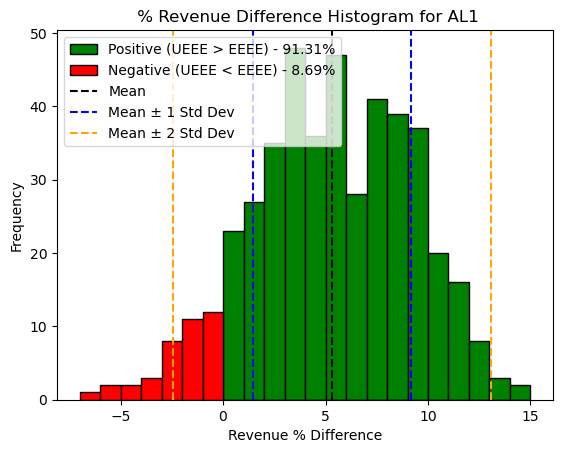

In [16]:
Helper.win_loss_histogram(final_df['rev_diff_pct'], 'AL1', num_bins=20)

In [35]:
# Define features for the ML model
features = ['UEEE_priceable_mix', 'forecast_mean', 'mean_positive_forecast_error', 'mean_negative_forecast_error']

X = final_df[features]
# Create target variable: 1 if UEEE performs better, 0 otherwise
final_df['target'] = (final_df['UEEE_revenue'] > final_df['EEEE_revenue']).astype(int)

Y = final_df['target']

# if X has any NaN values, fill them with 0
X = X.fillna(0)

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


In [46]:
from imblearn.over_sampling import RandomOverSampler

# Oversample the minority class
# we only want to resample the training data, not the test data
ros = RandomOverSampler(sampling_strategy=0.5, random_state=42) # Increase negative cases to 50% of positives
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

In [47]:
from imblearn.over_sampling import SMOTE

# Synthetic Minority Over-sampling Technique - Generates synthetic samples for the minority class (Y=0) using K-Nearest Neighbors (KNN).

smote = SMOTE(sampling_strategy=0.5, random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [48]:
print(X_resampled.shape, Y_resampled.shape)

(615, 4) (615,)


In [49]:
# Try XGBoost
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 95.56%


<Figure size 1200x800 with 0 Axes>

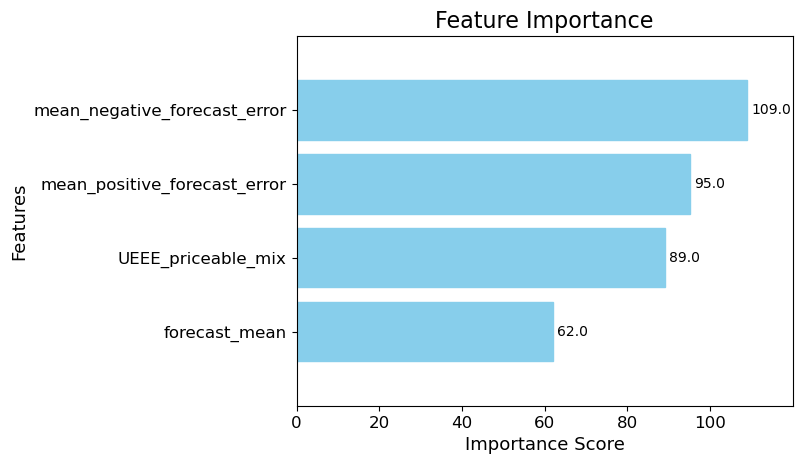

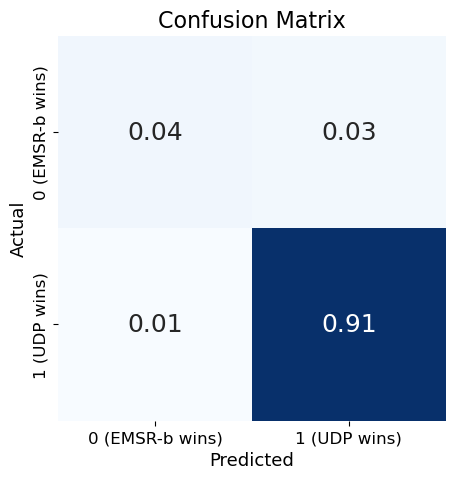

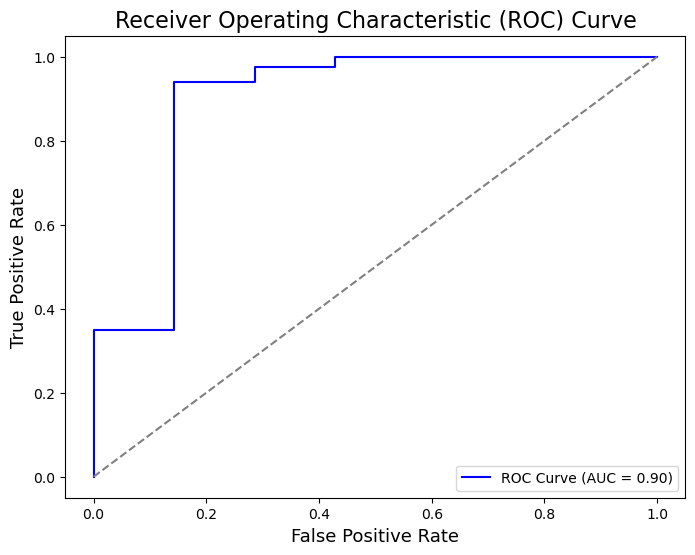

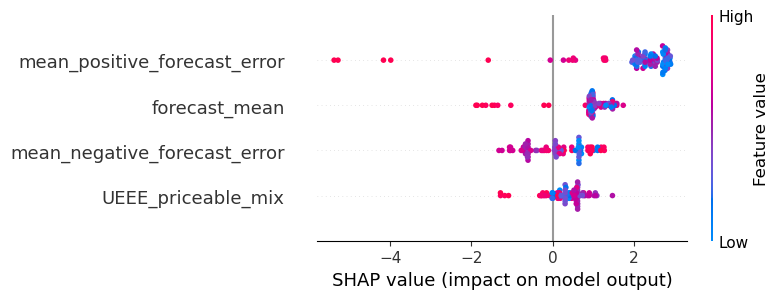

In [50]:
Helper.plot_model_evaluation(model, x_test, y_test)

In [51]:
# implement logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.97      1.00      0.98        83

    accuracy                           0.97        90
   macro avg       0.98      0.79      0.85        90
weighted avg       0.97      0.97      0.96        90



In [52]:
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': logistic_model.coef_[0]})
coefficients['Odds Ratio'] = np.exp(coefficients['Coefficient'])
print(coefficients)


                        Feature  Coefficient  Odds Ratio
0            UEEE_priceable_mix    -0.088937    0.914903
1                 forecast_mean    -0.242880    0.784366
2  mean_positive_forecast_error    -0.371549    0.689665
3  mean_negative_forecast_error    -0.019877    0.980319


In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logistic_model, X_resampled, Y_resampled, cv=5, scoring='accuracy')
scores.mean()

0.9073170731707318